In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import keras
import sklearn
import warnings
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,plot_roc_curve,log_loss,f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
import seaborn as sn
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, Dropout,LeakyReLU
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from keras.models import Sequential
from sklearn.metrics import roc_auc_score
warnings.simplefilter('ignore')

%matplotlib inline


### Importing the dataset

In [3]:
#Reading the DataSet
df = pd.read_csv('/content/drive/MyDrive/E-Learning/elearningdataset_level_activity.csv')

In [4]:
len(df. columns)

20

In [5]:
df.head()

,Age,Sex,Program of study,College,Level Study,Branch,Have a job,Attending method prefer more,experience in handling e-Learning platform tools,total number of lectures prefer to attend daily,frequently contact instructor to ask inquiries,motivated using the interfaces of the e-Learning Platform?,interested in revising the recorded lectures on the e-Learning platform,learning resource preferred most,Type of assessment activity preferred most?,Preferred semantic density (amount of content) displayed in a single power point slide,Preferred electronic device to access the course contents,Preferred background color for your e-Learning platform?,Preferred text color for your course text contents?,preferred level of interactivity type
0,30,1,17,1,8,4,1,2,1,3,1,1,1,9,1,2,3,5,2,1
1,30,1,17,2,3,2,2,2,2,6,2,2,1,9,4,1,2,2,5,2
2,20,1,1,3,4,4,1,1,1,5,3,1,3,9,4,1,3,5,2,3
3,21,2,11,4,3,6,2,2,3,3,3,3,1,2,1,3,2,1,2,3
4,33,1,8,3,5,6,1,2,1,5,2,3,3,7,4,2,2,3,2,2


In [6]:
df=df.dropna(how='all', axis=1)

In [7]:
df.isnull().sum()

Age                                                                                        0
Sex                                                                                        0
Program of study                                                                           0
College                                                                                    0
Level Study                                                                                0
Branch                                                                                     0
Have a job                                                                                 0
Attending method prefer more                                                               0
experience in handling e-Learning platform tools                                           0
total number of lectures prefer to attend daily                                            0
frequently contact instructor to ask inquiries                        

In [8]:
df['preferred level of interactivity type '].value_counts()

2    437
3    193
1    151
4     39
Name: preferred level of interactivity type , dtype: int64

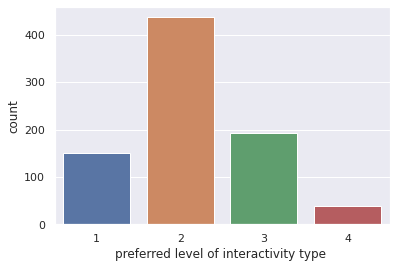

In [9]:
sns.set(style="darkgrid")
sn.countplot(df["preferred level of interactivity type "])
plt.show()

In [10]:
X=df.values[:,0:19]
y=df.values[:,19]

In [11]:
print(y)

[1 2 3 3 2 1 1 3 2 2 2 3 2 1 2 4 2 2 1 1 4 1 2 2 1 1 2 3 1 3 1 1 2 2 2 1 1
 2 3 3 4 2 2 1 3 2 2 2 2 2 3 3 1 3 4 2 1 1 3 1 4 4 1 1 1 2 1 3 2 3 3 2 3 3
 2 2 3 4 2 1 2 2 3 2 2 3 2 3 3 1 2 2 1 2 1 2 2 2 1 1 3 2 2 3 1 2 3 2 2 2 2
 3 3 2 4 3 2 1 4 2 1 2 2 1 2 1 3 2 3 3 2 1 2 2 1 3 2 1 2 2 2 3 1 2 2 1 3 1
 3 2 2 3 1 2 2 1 1 3 2 1 2 1 3 2 2 3 2 1 2 2 2 1 2 2 1 2 3 2 2 2 1 4 1 2 2
 1 3 4 2 2 2 2 2 2 2 2 2 2 2 3 2 4 3 3 1 2 2 2 2 1 3 2 3 2 2 2 2 2 1 1 1 3
 1 2 2 3 1 2 1 2 2 3 3 2 2 2 2 2 1 2 3 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 3 2 2 3 2 2 2 1 2 2 1 2 3 2 2 3 2 3 2 3 3 2 2 3 2 2 3 3 2 3
 2 3 2 3 2 2 2 3 3 2 2 2 2 2 3 3 2 2 2 2 3 3 3 3 2 2 2 3 2 3 2 3 2 2 1 2 2
 1 3 1 1 1 2 2 4 2 2 2 2 2 3 2 2 4 3 2 3 1 2 1 1 2 2 2 2 2 1 2 2 2 2 3 2 2
 2 2 2 3 2 2 2 3 3 3 3 2 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3 3 3 2 2 3 3 3 3 3
 4 2 3 3 3 3 2 3 3 3 3 3 2 3 4 4 1 2 1 2 3 2 2 2 2 2 2 2 1 2 2 2 2 3 3 2 4
 1 1 2 2 3 2 2 3 2 3 2 2 1 2 2 2 1 1 2 1 4 1 3 3 2 2 2 2 2 2 2 3 2 2 3 1 2
 1 2 2 4 1 2 2 3 3 2 2 2 

#### Spliting the dataset into test and train

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state = 35)

In [13]:
np.shape(y_train)

(574,)

In [14]:
np.shape(X_test)

(246, 19)

In [15]:
print(y_test)

[3 1 1 2 3 2 2 2 2 4 3 2 2 2 2 2 2 4 2 2 3 2 2 3 2 3 2 2 2 2 2 2 2 3 2 4 2
 1 1 3 1 2 2 3 2 3 3 3 2 2 2 2 3 2 2 2 2 2 2 3 2 3 2 1 2 1 2 2 4 3 3 2 2 2
 2 2 2 1 1 1 2 1 2 3 3 2 2 3 4 4 4 1 3 3 2 1 3 1 2 2 2 1 2 2 2 2 2 3 4 3 1
 2 2 2 1 4 2 2 4 1 2 4 3 2 1 2 2 2 1 1 2 2 3 3 2 2 3 3 1 3 1 2 2 3 2 2 2 1
 2 2 3 2 3 3 1 2 2 2 1 1 2 1 2 2 2 2 2 2 1 2 3 3 3 3 2 3 1 1 1 2 2 1 2 2 2
 3 2 1 1 2 3 4 2 2 2 1 3 3 2 3 3 3 2 2 2 1 3 1 2 1 2 2 3 2 2 3 3 4 4 1 3 2
 1 1 2 2 1 3 2 2 3 4 2 1 1 2 2 2 1 1 2 3 1 3 1 2]


In [16]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X = sc.fit_transform(X)


In [17]:
from sklearn import preprocessing
X = preprocessing.normalize(X)

In [18]:
print(X_train)

[[21  1  5 ...  2  3  1]
 [24  2  5 ...  2  3  2]
 [20  2  5 ...  2  3  1]
 ...
 [28  1  5 ...  2  1  3]
 [20  2  2 ...  2  3  1]
 [28  1  5 ...  2  2  1]]


#SMOTE

In [19]:
# # import SMOTE module from imblearn library 
# # pip install imblearn (if you don't have imblearn in your system) 
# from imblearn.over_sampling import SMOTE 
# strategy = {1:500, 2:500, 3:500, 4:500}

# sm = SMOTE(sampling_strategy=strategy)
# X_rs, y_rs = sm.fit_sample(X, y.ravel()) 
  
# print('After OverSampling, the shape of train_X: {}'.format(X_rs.shape)) 
# print('After OverSampling, the shape of train_y: {} \n'.format(y_rs.shape)) 
  
# print("After OverSampling, counts of label '1': {}".format(sum(y_rs == 1))) 
# print("After OverSampling, counts of label '2': {}".format(sum(y_rs == 2))) 
# print("After OverSampling, counts of label '3': {}".format(sum(y_rs == 3))) 
# print("After OverSampling, counts of label '4': {}".format(sum(y_rs == 4))) 

In [20]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from matplotlib.pyplot import *
strategy = {1:500, 2:500, 3:500, 4:500}
# sampling_strategy=strategy
sampler = RandomOverSampler(sampling_strategy=strategy,random_state=0)
X_rs, y_rs = sampler.fit_sample(X, y)

In [21]:
print(y_rs)

[1 2 3 ... 4 4 4]


In [22]:
X_rs.shape

(2000, 19)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rs,y_rs,test_size=0.30,random_state = 25,stratify = y_rs)

In [24]:
X_train.shape

(1400, 19)

In [25]:
from xgboost import XGBClassifier

#Random Forest

In [26]:
!pip install optunity

In [27]:
!pip install deap

In [28]:
!pip install sklearn-deap

In [29]:
#Random Forest
import evolutionary_search
from evolutionary_search import EvolutionaryAlgorithmSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': np.logspace(50,2000,num = 10 ,base=10,dtype='int'),
    'max_depth': np.logspace(1,2,num = 10 ,base=10,dtype='int'),
    #"max_features":np.logspace(0.2,1,num = 5 ,base=8,dtype='int'),
    "min_samples_split":np.logspace(0.4, 1, num=5, base=10, dtype='int'), #[2, 3, 5, 7, 10],
    "min_samples_leaf":np.logspace(0.1,1,num = 5 ,base=11,dtype='int'),
    "criterion":['gini','entropy']
}
rf_params = {
    'n_estimators': range(50,2000),
    #"max_features":range(1,64),
    'max_depth': range(5,10),
    "min_samples_split":range(2,11),
    "min_samples_leaf":range(1,11),
    #Categorical(name='criterion', categories=['gini','entropy'])#
    "criterion":['gini','entropy']
}
clf = RandomForestClassifier(random_state=0)
# Set the hyperparameters of GA 
ga1 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                   params=rf_params,
                                   scoring="accuracy",
                                   cv=3,
                                   verbose=1,
                                   population_size=100,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=10,
                                   n_jobs=1)
ga1.fit(X_train, y_train)
print(ga1.best_params_)
print("Accuracy:"+ str(ga1.best_score_))
predrf = ga1.predict(X_test)


# make predictions for test data
a=accuracy_score(y_test,predrf)
p=precision_score(y_test, predrf,average='macro')
r=recall_score(y_test, predrf,average='macro')
f=f1_score(y_test, predrf,average='macro')

print ("Accuracy:    %.2f%%"  %  (a*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
from sklearn.metrics import classification_report
print(classification_report(y_test,predrf))

Types [1, 1, 1, 1, 1] and maxint [1949, 4, 8, 9, 1] detected
--- Evolve in 1755000 possible combinations ---
gen	nevals	avg     	min 	max     	std      
0  	100   	0.736221	0.65	0.809286	0.0424374
1  	56    	0.769729	0.69	0.811429	0.0257123
2  	68    	0.789271	0.726429	0.811429	0.0172207
3  	69    	0.800607	0.74    	0.812857	0.0120929
4  	64    	0.806164	0.747143	0.812857	0.00761822
5  	53    	0.807929	0.695   	0.813571	0.0141938 
6  	63    	0.810914	0.797857	0.817857	0.00308234
7  	62    	0.8111  	0.775   	0.817857	0.00478456
8  	61    	0.810514	0.704286	0.817857	0.0137355 
9  	69    	0.813093	0.761429	0.817857	0.0058876 
10 	66    	0.814564	0.789286	0.817857	0.00397042
Best individual is: {'n_estimators': 120, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 1, 'criterion': 'entropy'}
with fitness: 0.8178571428571428
{'n_estimators': 120, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 1, 'criterion': 'entropy'}
Accuracy:0.8178571428571428
Accuracy:    85.50%
P

#SVM

In [30]:
#SVM
from evolutionary_search import EvolutionaryAlgorithmSearchCV
rf_params = {
    'C': np.random.uniform(0,50,1000),
    "kernel":['linear','poly','rbf','sigmoid']
}
clf = SVC(gamma='scale')
ga1 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                   params=rf_params,
                                   scoring="accuracy",
                                   cv=5,
                                   verbose=1,
                                   population_size=100,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=10,
                                   n_jobs=1)
ga1.fit(X_train, y_train)
print(ga1.best_params_)
print("Accuracy:"+ str(ga1.best_score_))
predsvm = ga1.predict(X_test)

# make predictions for test data
a=accuracy_score(y_test,predsvm)
p=precision_score(y_test, predsvm,average='macro')
r=recall_score(y_test, predsvm,average='macro')
f=f1_score(y_test, predsvm,average='macro')
# auc=roc_auc_score(y_test, predsvm)
print ("Accuracy:    %.2f%%"  %  (a*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
# print ("ROC_AUC: %.2f%%"  %  (auc*100))

from sklearn.metrics import classification_report
print(classification_report(y_test,predsvm))


Types [2, 1] and maxint [999, 3] detected
--- Evolve in 4000 possible combinations ---
gen	nevals	avg     	min     	max     	std      
0  	100   	0.475693	0.350714	0.585714	0.0661788
1  	57    	0.533471	0.396429	0.585714	0.047218 
2  	69    	0.561936	0.397143	0.585714	0.0315019
3  	58    	0.567421	0.394286	0.587143	0.0350304
4  	65    	0.576829	0.385   	0.587143	0.0277368
5  	65    	0.578814	0.395   	0.587143	0.0221307
6  	69    	0.573629	0.387857	0.587143	0.0296007
7  	59    	0.578621	0.497143	0.587143	0.0168503
8  	51    	0.569143	0.367857	0.587143	0.0377952
9  	68    	0.5674  	0.39    	0.587143	0.0365856
10 	58    	0.575314	0.432143	0.587857	0.0282166
Best individual is: {'C': 48.337777372993344, 'kernel': 'poly'}
with fitness: 0.5878571428571429
{'C': 48.337777372993344, 'kernel': 'poly'}
Accuracy:0.5878571428571429
Accuracy:    61.67%
Precision:  61.17%
Recall:  61.67%
F1_score: 60.29%
              precision    recall  f1-score   support

           1       0.58      0.70      0.

In [31]:
# y_true = np.argmax(y_test, axis=0)

In [32]:
# def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
#     lb = LabelBinarizer()
#     lb.fit(y_test)
#     y_test = lb.transform(y_test)
#     y_pred = lb.transform(y_pred)


# roc_auc_score(y_test, predsvm, average='macro')

#KNN

In [33]:
#KNN
from evolutionary_search import EvolutionaryAlgorithmSearchCV
rf_params = {
    'n_neighbors': range(1,20),
}
clf = KNeighborsClassifier()
ga1 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                   params=rf_params,
                                   scoring="accuracy",
                                   cv=3,
                                   verbose=1,
                                   population_size=100,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=10,
                                   n_jobs=1)
ga1.fit(X_train, y_train)
print(ga1.best_params_)
print("Accuracy:"+ str(ga1.best_score_))
predknn = ga1.predict(X_test)
# make predictions for test data
a=accuracy_score(y_test,predknn)
p=precision_score(y_test, predknn,average='macro')
r=recall_score(y_test, predknn,average='macro')
f=f1_score(y_test, predknn,average='macro')
print ("Accuracy:    %.2f%%"  %  (a*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
from sklearn.metrics import classification_report
print(classification_report(y_test,predknn))


Types [1] and maxint [18] detected
--- Evolve in 19 possible combinations ---
gen	nevals	avg     	min     	max     	std     
0  	100   	0.575321	0.466429	0.815714	0.104504
1  	59    	0.6651  	0.477857	0.815714	0.0989179
2  	62    	0.761021	0.487143	0.815714	0.0738561
3  	60    	0.799779	0.493571	0.815714	0.0550435
4  	60    	0.813529	0.597143	0.815714	0.0217476
5  	70    	0.8054  	0.467143	0.815714	0.0586524
6  	62    	0.809186	0.487143	0.815714	0.0403294
7  	58    	0.807129	0.474286	0.815714	0.0491783
8  	56    	0.815014	0.745714	0.815714	0.00696491
9  	66    	0.809014	0.467857	0.815714	0.0469352 
10 	54    	0.8105  	0.588571	0.815714	0.0304213 
Best individual is: {'n_neighbors': 1}
with fitness: 0.8157142857142857
{'n_neighbors': 1}
Accuracy:0.8157142857142857
Accuracy:    86.17%
Precision:  85.88%
Recall:  86.17%
F1_score: 85.83%
              precision    recall  f1-score   support

           1       0.90      0.92      0.91       150
           2       0.79      0.67      0.72  

#Gradient Boosting

In [34]:
import evolutionary_search
from evolutionary_search import EvolutionaryAlgorithmSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'learning_rate':np.logspace(0.1, 1, num=5, base=8, dtype='int'), #[2, 3, 5, 7, 10],
    'n_estimators': np.logspace(1,1.8,num = 10 ,base=20,dtype='int'),
    'max_depth': np.logspace(1,2,num = 10 ,base=10,dtype='int'),
    #"max_features":np.logspace(0.2,1,num = 5 ,base=8,dtype='int'),
    "subsample":np.logspace(0.1, 1, num=5, base=8), #[2, 3, 5, 7, 10],
    # "min_samples_leaf":np.logspace(0.1,1,num = 5 ,base=11,dtype='int'),
    # "criterion":['gini','entropy']
}
rf_params = {
    'learning_rate': range(1,2),
    'n_estimators': range(50,1000),
    #"max_features":range(1,64),
    'max_depth': range(2,50),
    "subsample":range(1,2)
    # "min_samples_leaf":range(1,11),
    #Categorical(name='criterion', categories=['gini','entropy'])#
    # "criterion":['gini','entropy']
}
clf = GradientBoostingClassifier(random_state=0)
# Set the hyperparameters of GA 
ga1 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                   params=rf_params,
                                   scoring="accuracy",
                                   cv=3,
                                   verbose=1,
                                   population_size=100,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=10,
                                   n_jobs=1)
ga1.fit(X_train, y_train)
print(ga1.best_params_)
print("Accuracy:"+ str(ga1.best_score_))
predgb = ga1.predict(X_test)


# make predictions for test data
a=accuracy_score(y_test,predgb)
p=precision_score(y_test, predgb,average='macro')
r=recall_score(y_test, predgb,average='macro')
f=f1_score(y_test, predgb,average='macro')
print ("Accuracy:    %.2f%%"  %  (a*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
from sklearn.metrics import classification_report
print(classification_report(y_test,predgb))

Types [1, 1, 1, 1] and maxint [0, 949, 47, 0] detected
--- Evolve in 45600 possible combinations ---
gen	nevals	avg     	min     	max     	std      
0  	100   	0.810486	0.797143	0.832143	0.0111437
1  	55    	0.819579	0.797857	0.832143	0.00969383
2  	64    	0.82725 	0.798571	0.835714	0.00469952
3  	62    	0.829043	0.799286	0.835714	0.00545596
4  	63    	0.831293	0.827857	0.835714	0.00192909
5  	70    	0.832079	0.798571	0.835714	0.00414544
6  	76    	0.833743	0.799286	0.835714	0.00432496
7  	64    	0.834814	0.808571	0.835714	0.00392353
8  	57    	0.834971	0.802857	0.835714	0.00450274
9  	48    	0.834564	0.798571	0.835714	0.00611029
10 	64    	0.835043	0.804286	0.835714	0.00441452
Best individual is: {'learning_rate': 1, 'n_estimators': 540, 'max_depth': 6, 'subsample': 1}
with fitness: 0.8357142857142857
{'learning_rate': 1, 'n_estimators': 540, 'max_depth': 6, 'subsample': 1}
Accuracy:0.8357142857142857
Accuracy:    87.00%
Precision:  86.80%
Recall:  87.00%
F1_score: 86.85%
            

#XGBoost

In [35]:
import evolutionary_search
from evolutionary_search import EvolutionaryAlgorithmSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators':np.logspace(50, 10000, num=10, base=10, dtype='int'), #[2, 3, 5, 7, 10],
    'max_depth': np.logspace(2,10,num = 10 ,base=10,dtype='int'),
    'subsample': np.logspace(0.1,1,num = 10 ,base=8),
    "colsample_bytree":np.logspace(0.1, 1, num=10, base=8), #[2, 3, 5, 7, 10],
    "colsample_bylevel":np.logspace(0.1,1,num = 5 ,base=8),
     "learning_rate":np.logspace(0.1,1,num = 5 ,base=8)
    # "criterion":['gini','entropy']
}
rf_params = {
    "n_estimators": range(100, 10000),
    "max_depth": range(2, 10),
    "subsample": range(1,2),
    "colsample_bytree":range(1,2),
    "colsample_bylevel": range(1,2),    
    "learning_rate": range(1,2), 
}
clf = XGBClassifier(random_state=0)
# Set the hyperparameters of GA 
ga1 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                   params=rf_params,
                                   scoring="accuracy",
                                   cv=3,
                                   verbose=1,
                                   population_size=100,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=10,
                                   n_jobs=1)
ga1.fit(X_train, y_train)
print(ga1.best_params_)
print("Accuracy:"+ str(ga1.best_score_))
predxgb = ga1.predict(X_test)
# make predictions for test data
a=accuracy_score(y_test,predxgb)
p=precision_score(y_test, predxgb,average='macro')
r=recall_score(y_test, predxgb,average='macro')
f=f1_score(y_test, predxgb,average='macro')
print ("Accuracy:    %.2f%%"  %  (a*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
from sklearn.metrics import classification_report
print(classification_report(y_test,predxgb))

Types [1, 1, 1, 1, 1, 1] and maxint [9899, 7, 0, 0, 0, 0] detected
--- Evolve in 79200 possible combinations ---
gen	nevals	avg     	min     	max     	std       
0  	100   	0.819521	0.811429	0.829286	0.00372259
1  	60    	0.822543	0.813571	0.829286	0.002902  
2  	63    	0.824343	0.816429	0.829286	0.00297555
3  	48    	0.826386	0.818571	0.829286	0.0026894 
4  	57    	0.82865 	0.826429	0.829286	0.00091971
5  	54    	0.829164	0.826429	0.829286	0.000485031
6  	68    	0.829136	0.819286	0.829286	0.00106088 
7  	58    	0.829257	0.826429	0.829286	0.000284282
8  	59    	0.8289  	0.818571	0.829286	0.00181102 
9  	60    	0.828771	0.816429	0.829286	0.00219944 
10 	57    	0.829121	0.813571	0.831429	0.00160311 
Best individual is: {'n_estimators': 108, 'max_depth': 8, 'subsample': 1, 'colsample_bytree': 1, 'colsample_bylevel': 1, 'learning_rate': 1}
with fitness: 0.8314285714285714
{'n_estimators': 108, 'max_depth': 8, 'subsample': 1, 'colsample_bytree': 1, 'colsample_bylevel': 1, 'learning_rate': 1

#AdaBoost

In [36]:
import evolutionary_search
from evolutionary_search import EvolutionaryAlgorithmSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators':np.logspace(50, 10000, num=20, base=10, dtype='int'), #[2, 3, 5, 7, 10],
     "learning_rate":np.logspace(0.1,1,num = 20 ,base=8)
    # "criterion":['gini','entropy']
}
rf_params = {
    "n_estimators": range(50, 10000),  
    "learning_rate": range(1,2), 
}
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10,min_samples_leaf=2, min_samples_split=4 ),random_state=0)
# Set the hyperparameters of GA 
ga1 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                   params=rf_params,
                                   scoring="accuracy",
                                   cv=3,
                                   verbose=1,
                                   population_size=100,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=10,
                                   n_jobs=1)
ga1.fit(X_train, y_train)
print(ga1.best_params_)
print("Accuracy:"+ str(ga1.best_score_))
predadab = ga1.predict(X_test)


# make predictions for test data
a=accuracy_score(y_test,predadab)
p=precision_score(y_test, predadab,average='macro')
r=recall_score(y_test, predadab,average='macro')
f=f1_score(y_test, predadab,average='macro')
print ("Accuracy:    %.2f%%"  %  (a*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
from sklearn.metrics import classification_report
print(classification_report(y_test,predadab))

Types [1, 1] and maxint [9949, 0] detected
--- Evolve in 9950 possible combinations ---
gen	nevals	avg     	min 	max     	std       
0  	100   	0.843114	0.84	0.854286	0.00307312
1  	56    	0.84635 	0.84	0.854286	0.00423409
2  	62    	0.849879	0.841429	0.854286	0.00363101
3  	63    	0.852514	0.842857	0.854286	0.00186668
4  	50    	0.853543	0.842857	0.854286	0.00143896
5  	43    	0.853836	0.840714	0.854286	0.00220772
6  	59    	0.853664	0.84    	0.854286	0.00273051
7  	65    	0.854164	0.842143	0.854286	0.0012082 
8  	68    	0.854157	0.844286	0.854286	0.00103204
9  	57    	0.854043	0.841429	0.854286	0.001703  
10 	61    	0.853886	0.842143	0.854286	0.00209548
Best individual is: {'n_estimators': 686, 'learning_rate': 1}
with fitness: 0.8542857142857143
{'n_estimators': 686, 'learning_rate': 1}
Accuracy:0.8542857142857143
Accuracy:    90.50%
Precision:  91.08%
Recall:  90.50%
F1_score: 90.63%
              precision    recall  f1-score   support

           1       0.94      0.89      0.92 